In [43]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [44]:
def calculate_efficiency(pred_label_0, pred_label_1, thresholds):
    efficiencies = {}
    for threshold in thresholds:
        eff_key_check = f"ele_eff_mu_{int(threshold*1000)}_miss_id_check"
        eff_key = f"ele_eff_mu_{int(threshold*1000)}_miss_id"
        cut_value = np.sort(pred_label_0)[int(len(pred_label_0) * (threshold))]
        
        efficiencies[eff_key_check] = np.mean(pred_label_0 > cut_value)
        efficiencies[eff_key] = np.mean(pred_label_1 > cut_value)
        
        rej_key_check = f"mu_rej_ele_{int(threshold*1000)}_miss_id_check"
        rej_key = f"mu_rej_ele_{int(threshold*1000)}_miss_id"
        cut_value = np.sort(pred_label_1)[int(len(pred_label_1) * (1 - threshold))]
        
        efficiencies[rej_key_check] = np.mean(pred_label_1 > cut_value)
        efficiencies[rej_key] = np.mean(pred_label_0 > cut_value)
        
    return efficiencies

In [45]:

uni = "vtx_type1_16f_4h_200n_9l_mu0_e1_0516" 
# uni = "vtx_type1_nopadding_16f_4h_200n_9l_mu0_e1  _500MeV_0516" 
# uni = "pid_mu0_e1_500MeV_nopadding_1_32_8_64_100"

path = "/users/yewzzang/work/KNO_reconstruction/KNO_pid/result/*"+uni +"*/*"+uni +".csv"

pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [46]:
df = pd.read_csv(pred_list[0])

In [47]:
pred = np.array(df['prediction']).reshape(-1,1)
label = np.array(df['label']).reshape(-1,1)
fname = np.array(df['fname']).reshape(-1,1)

In [48]:
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.hist(pred[label==1],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='elec')
# plt.hist(pred[label==0],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label='mu')
# plt.legend(loc='upper center')


# acc = (((pred[(label==1)]>0.5).sum()+(pred[(label==0)]<0.5).sum())/pred.shape[0])*100
# elec_events = pred[(label==1)].shape[0]
# mu_events = pred[(label==0)].shape[0]


# pred_label_0 = pred[label == 0]
# pred_label_1 = pred[label == 1]

# # ele_eff_mu_9999_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.0001)])
# # ele_eff_mu_9999_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.0001)])

# ele_eff_mu_995_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.005)])
# ele_eff_mu_995_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.005)])

# ele_eff_mu_99_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.01)])
# ele_eff_mu_99_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.01)])

# ele_eff_mu_95_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.05)])
# ele_eff_mu_95_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.05)])

# ele_eff_mu_90_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.1)])
# ele_eff_mu_90_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.1)])


# mu_rej_ele_90_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.90)])
# mu_rej_ele_90_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.90)])

# mu_rej_ele_95_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.95)])
# mu_rej_ele_95_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.95)])

# mu_rej_ele_99_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.99)])
# mu_rej_ele_99_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.99)])

# mu_rej_ele_995_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.995)])
# mu_rej_ele_995_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.995)])

# # mu_rej_ele_9999_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.9999)])
# # mu_rej_ele_9999_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.9999)])



# # plt.figtext(0.2, 0.7, f'Energy: {energy} MeV', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')
# plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
# plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')



# # plt.figtext(0.95, 0.80, f'mu miss id 0.01% eff -> elec eff: {(100*(ele_eff_mu_9999_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.75, f'mu miss id 0.5% eff -> elec eff: {(100*(ele_eff_mu_995_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.70, f'mu miss id 1% eff -> elec eff: {(100*(ele_eff_mu_99_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.65, f'mu miss id 5% eff -> elec eff: {(100*(ele_eff_mu_95_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.60, f'mu miss id 10% eff -> elec eff: {(100*(ele_eff_mu_90_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')



# # plt.figtext(0.95, 0.50, f'elec 99.99% eff -> mu rej: {(100*(1-mu_rej_ele_9999_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.45, f'elec 99.5% eff -> mu rej: {(100*(1-mu_rej_ele_995_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.40, f'elec 99% eff -> mu rej: {(100*(1-mu_rej_ele_99_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.35, f'elec 95% eff -> mu rej: {(100*(1-mu_rej_ele_95_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
# plt.figtext(0.95, 0.30, f'elec 90% eff -> mu rej: {(100*(1-mu_rej_ele_90_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')


# plt.xlabel('Model Score',fontsize=15)

# plt.show()

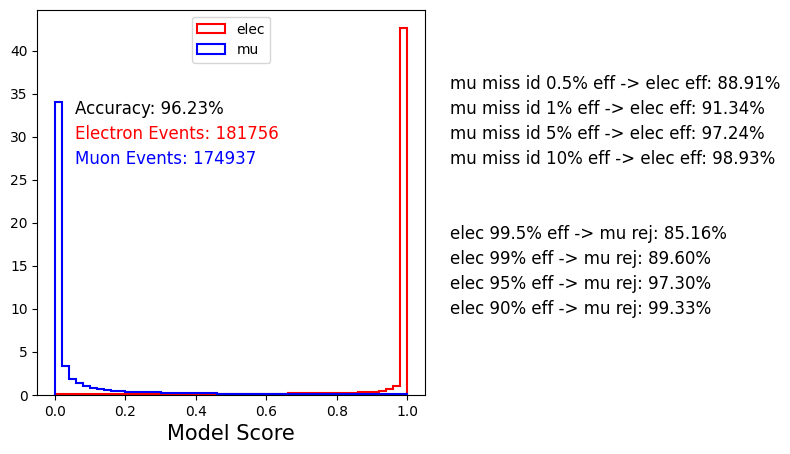

In [49]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.hist(pred[label==1],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='elec')
plt.hist(pred[label==0],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label='mu')
plt.legend(loc='upper center')


acc = (((pred[(label==1)]>0.5).sum()+(pred[(label==0)]<0.5).sum())/pred.shape[0])*100
elec_events = pred[(label==1)].shape[0]
mu_events = pred[(label==0)].shape[0]


pred_label_0 = pred[label == 0]
pred_label_1 = pred[label == 1]



thresholds = [0.995, 0.99, 0.95, 0.90]
efficiencies = calculate_efficiency(pred_label_0, pred_label_1, thresholds)

# for key, value in efficiencies.items():
#     print(f"{key}: {value}")

plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')


plt.figtext(0.95, 0.75, f'mu miss id 0.5% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.70, f'mu miss id 1% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.65, f'mu miss id 5% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.60, f'mu miss id 10% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')



plt.figtext(0.95, 0.45, f'elec 99.5% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.40, f'elec 99% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.35, f'elec 95% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.30, f'elec 90% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')




plt.xlabel('Model Score',fontsize=15)

plt.show()

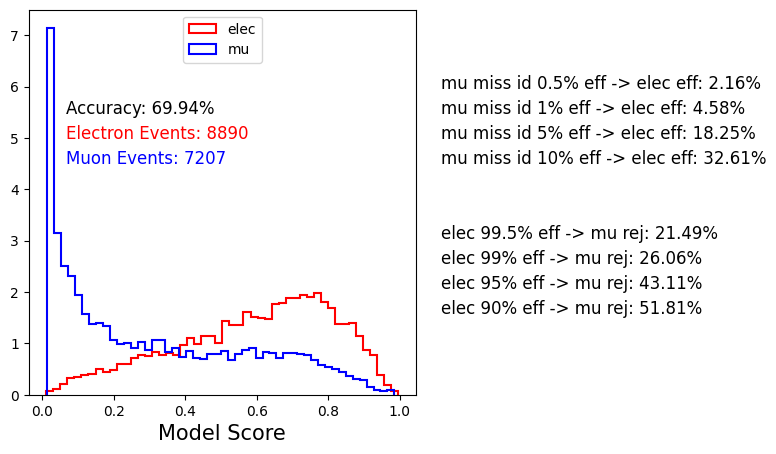

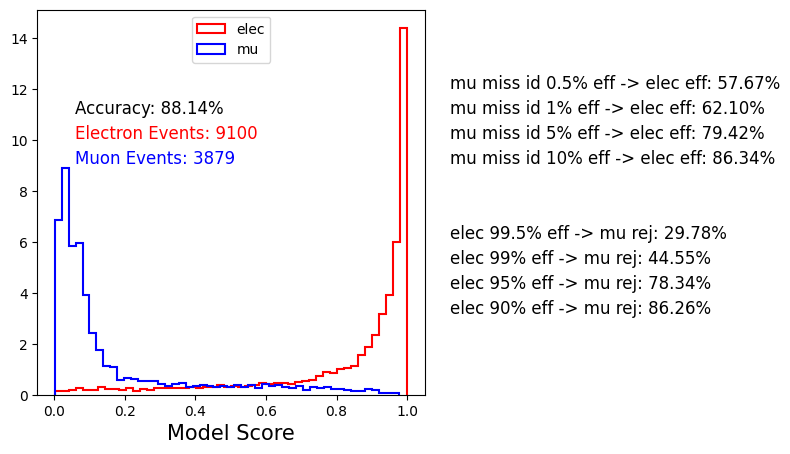

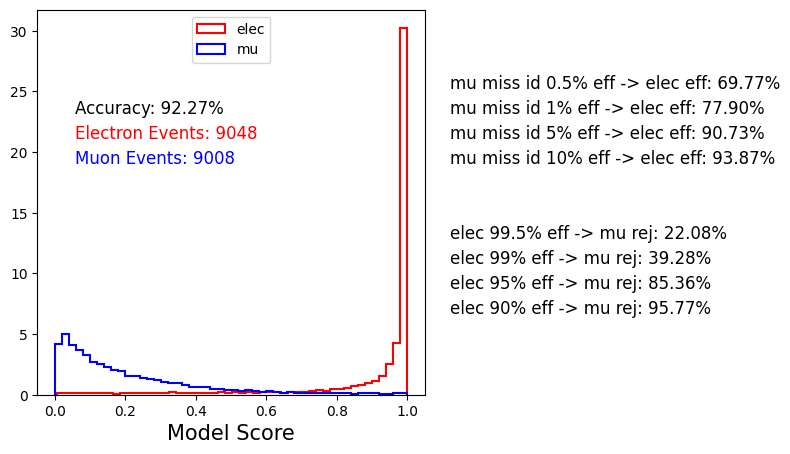

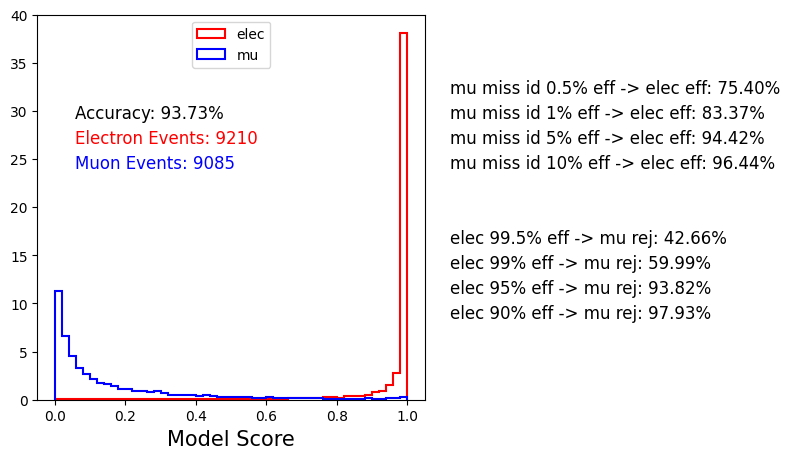

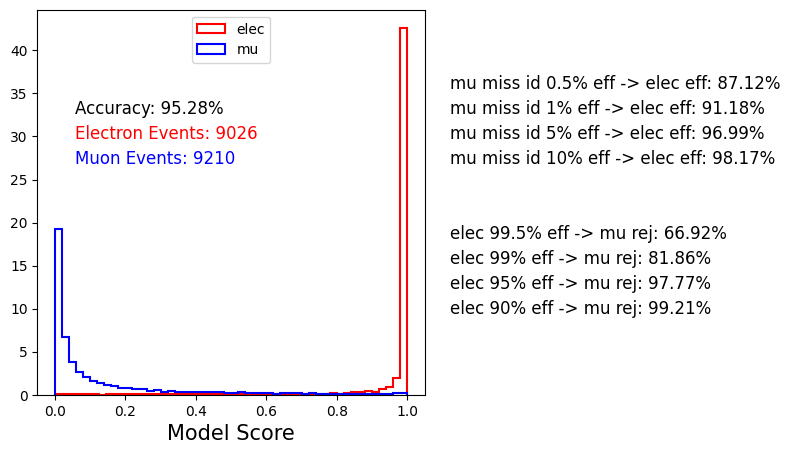

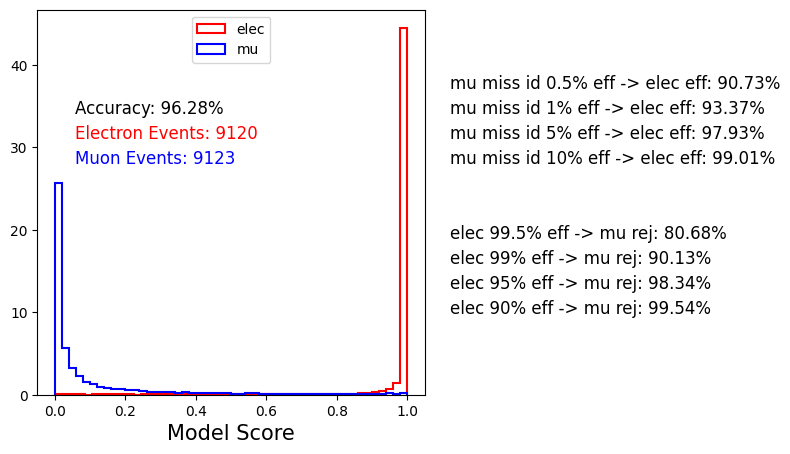

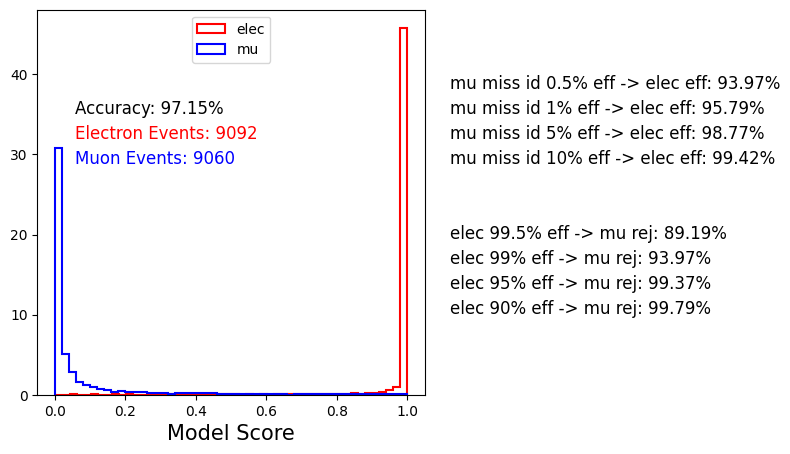

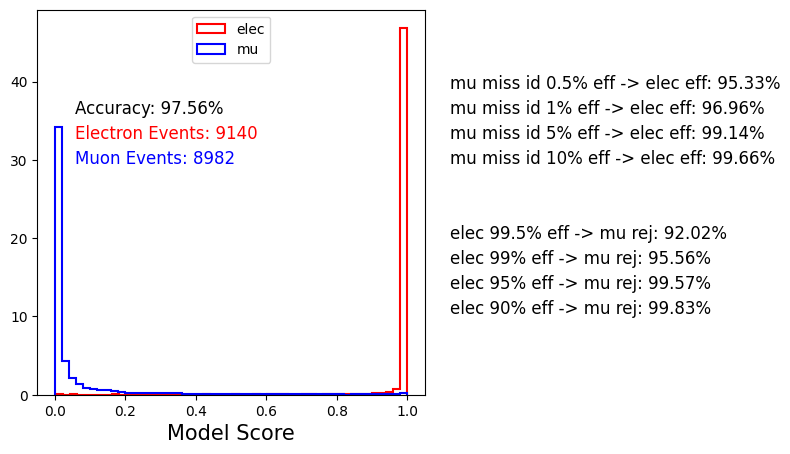

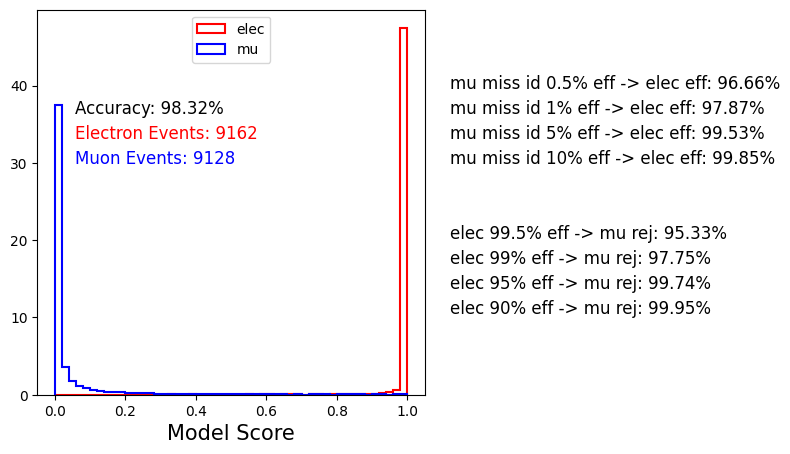

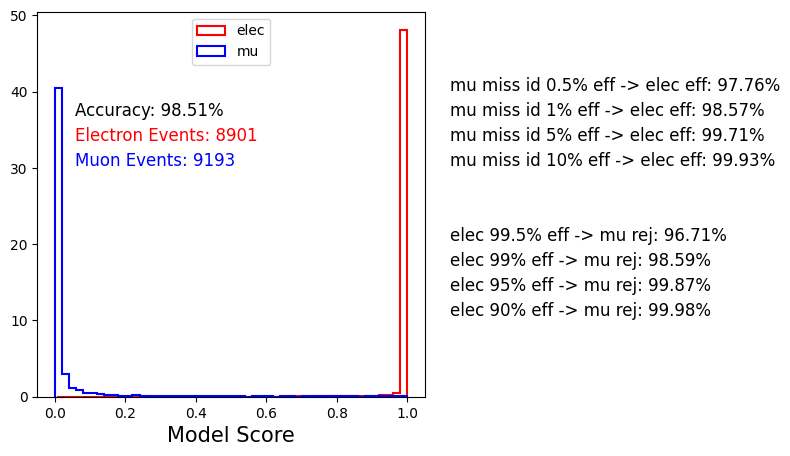

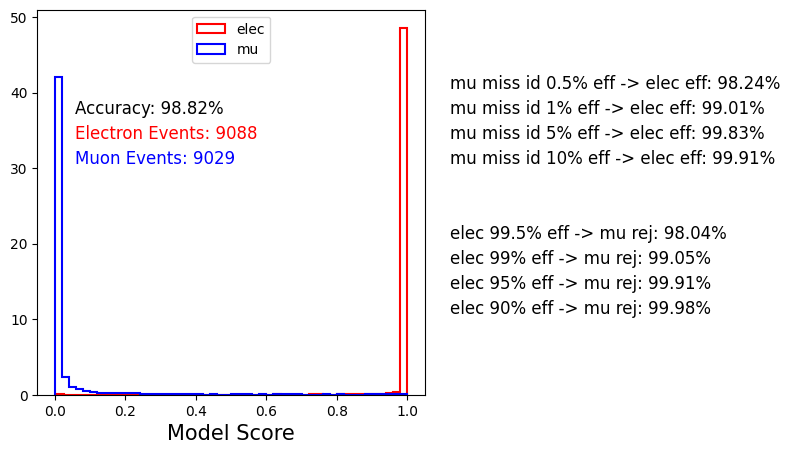

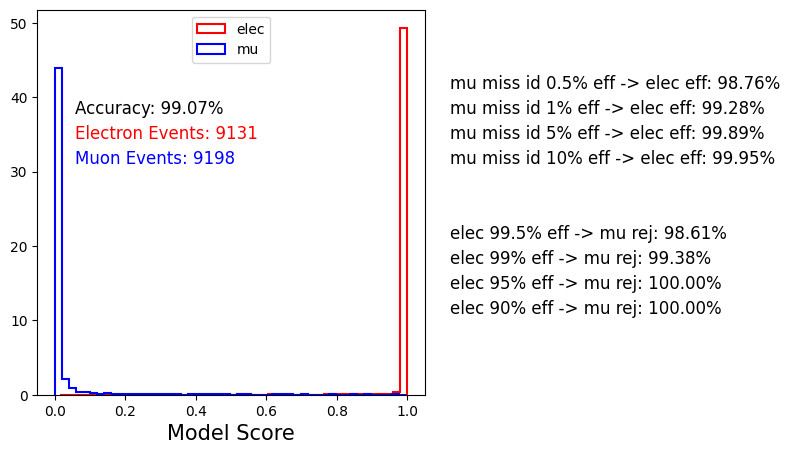

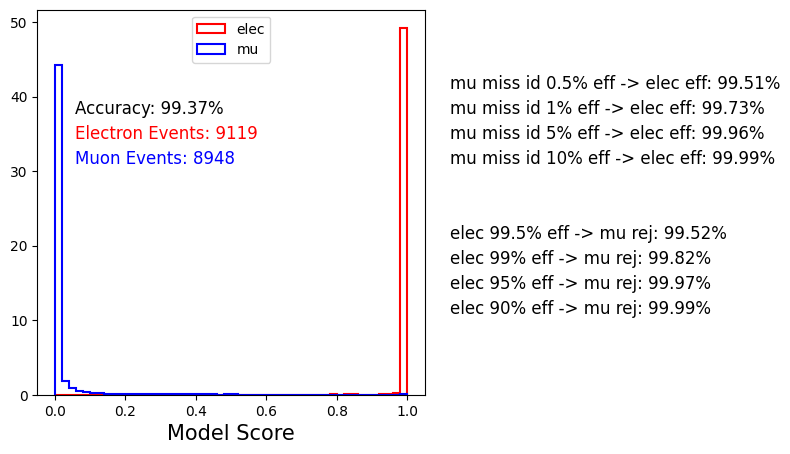

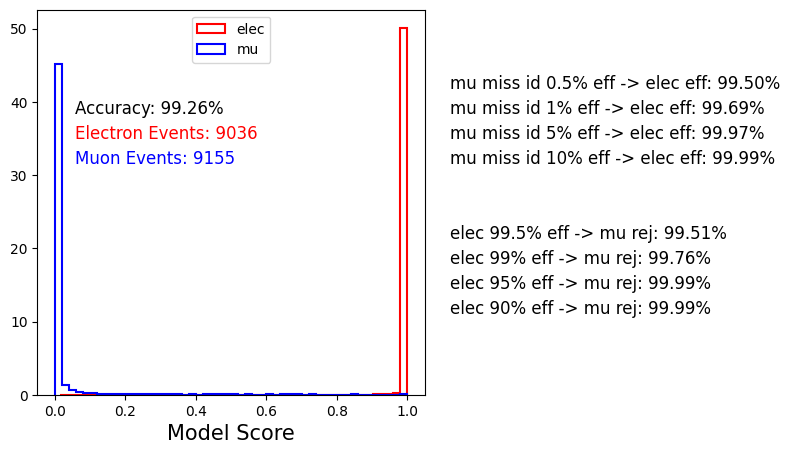

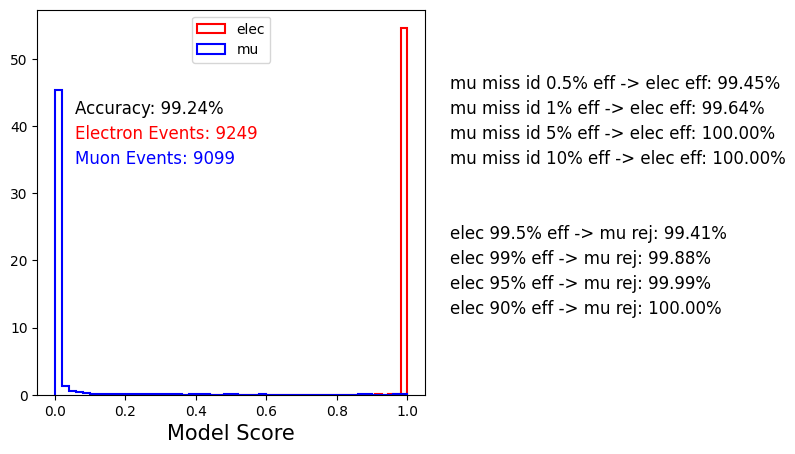

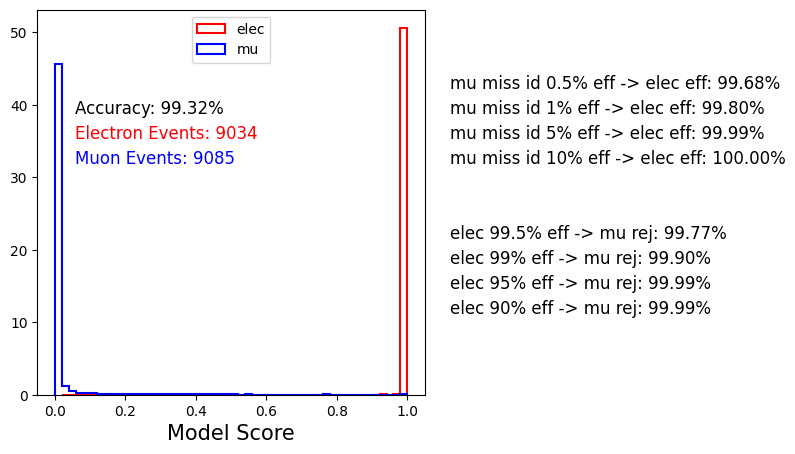

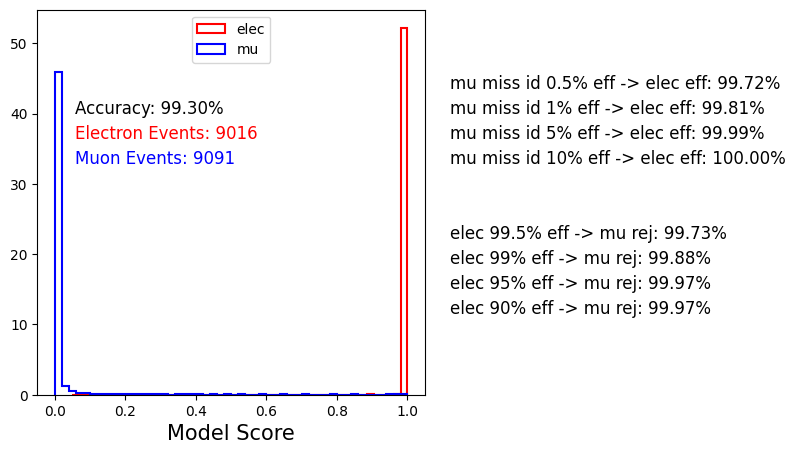

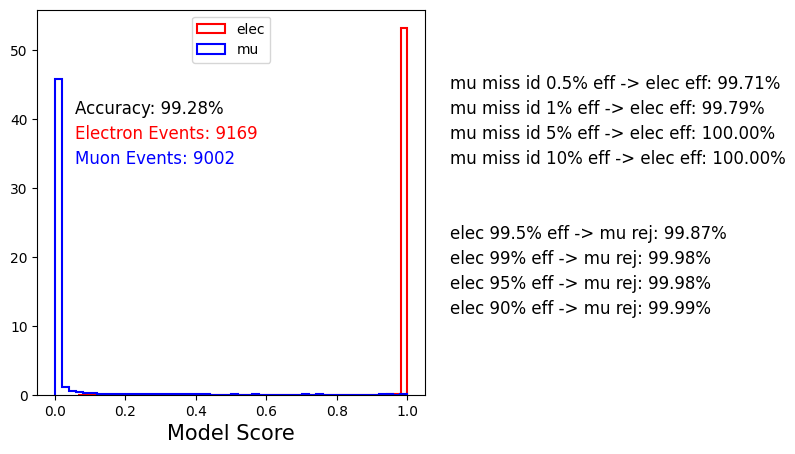

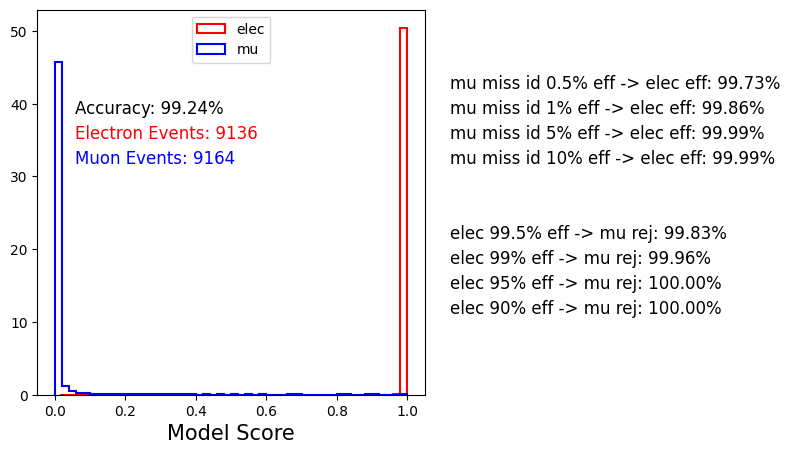

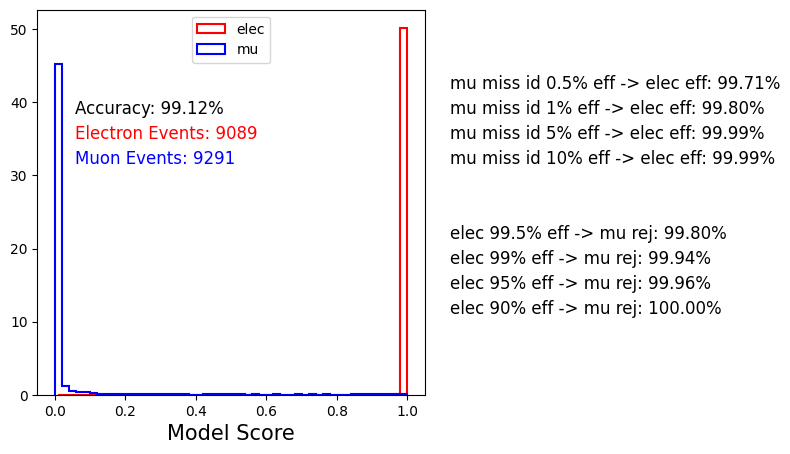

In [50]:
for energy in range(50,1050,50):
    if ((pred[(label==1)&(fname==energy)].shape[0]>0) & (pred[(label==0)&(fname==energy)].shape[0]>0)):
        
        plt.rcParams['figure.figsize'] = (5, 5)
        plt.hist(pred[(label==1)&(fname==energy)],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='elec')
        plt.hist(pred[(label==0)&(fname==energy)],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label='mu')
        plt.legend(loc='upper center')
        acc = (((pred[(label==1)&(fname==energy)]>0.5).sum()+(pred[(label==0)&(fname==energy)]<0.5).sum())/pred[fname==energy].shape[0])*100
        elec_events = pred[(label==1)&(fname==energy)].shape[0]
        mu_events = pred[(label==0)&(fname==energy)].shape[0]

        pred_label_0 = pred[(label==0)&(fname==energy)]
        pred_label_1 = pred[(label==1)&(fname==energy)]



        thresholds = [0.995, 0.99, 0.95, 0.90]
        efficiencies = calculate_efficiency(pred_label_0, pred_label_1, thresholds)

        # for key, value in efficiencies.items():
        #     print(f"{key}: {value}")

        plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
        plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')


        plt.figtext(0.95, 0.75, f'mu miss id 0.5% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.70, f'mu miss id 1% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.65, f'mu miss id 5% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.60, f'mu miss id 10% eff -> elec eff: {(100*(efficiencies["ele_eff_mu_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')



        plt.figtext(0.95, 0.45, f'elec 99.5% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.40, f'elec 99% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.35, f'elec 95% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.30, f'elec 90% eff -> mu rej: {(100*(1-efficiencies["mu_rej_ele_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')


        plt.xlabel('Model Score',fontsize=15)
        # plt.ylabel('Num Events',fontsize=15)
        plt.show()

In [51]:
# for energy in range(50,1050,50):
#     if ((pred[(label==1)&(fname==energy)].shape[0]>0) & (pred[(label==0)&(fname==energy)].shape[0]>0)):
        
#         plt.rcParams['figure.figsize'] = (5, 5)
#         plt.hist(pred[(label==1)&(fname==energy)],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='elec')
#         plt.hist(pred[(label==0)&(fname==energy)],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label='mu')
#         plt.legend(loc='upper center')
#         acc = (((pred[(label==1)&(fname==energy)]>0.5).sum()+(pred[(label==0)&(fname==energy)]<0.5).sum())/pred[fname==energy].shape[0])*100
#         elec_events = pred[(label==1)&(fname==energy)].shape[0]
#         mu_events = pred[(label==0)&(fname==energy)].shape[0]

#         pred_label_0 = pred[(label==0)&(fname==energy)]
#         pred_label_1 = pred[(label==1)&(fname==energy)]

#         # ele_eff_mu_9999_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.0001)])
#         # ele_eff_mu_9999_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.0001)])

#         ele_eff_mu_995_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.005)])
#         ele_eff_mu_995_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.005)])

#         ele_eff_mu_99_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.01)])
#         ele_eff_mu_99_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.01)])

#         ele_eff_mu_95_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.05)])
#         ele_eff_mu_95_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.05)])

#         ele_eff_mu_90_miss_id_check = np.mean(pred_label_0>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.1)])
#         ele_eff_mu_90_miss_id = np.mean(pred_label_1>np.sort(pred_label_0)[np.sort(pred_label_0).shape[0]-int(np.sort(pred_label_0).shape[0]*0.1)])


#         mu_rej_ele_90_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.90)])
#         mu_rej_ele_90_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.90)])

#         mu_rej_ele_95_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.95)])
#         mu_rej_ele_95_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.95)])

#         mu_rej_ele_99_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.99)])
#         mu_rej_ele_99_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.99)])

#         mu_rej_ele_995_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.995)])
#         mu_rej_ele_995_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.995)])

#         # mu_rej_ele_9999_miss_id_check = np.mean(pred_label_1>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.9999)])
#         # mu_rej_ele_9999_miss_id = np.mean(pred_label_0>np.sort(pred_label_1)[np.sort(pred_label_1).shape[0]-int(np.sort(pred_label_1).shape[0]*0.9999)])




#         plt.figtext(0.2, 0.75, f'Energy: {energy} MeV', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')
#         plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
#         plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')

                
#         # plt.figtext(0.95, 0.80, f'mu miss id 0.01% eff -> elec eff: {(100*(ele_eff_mu_9999_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.75, f'mu miss id 0.5% eff -> elec eff: {(100*(ele_eff_mu_995_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.70, f'mu miss id 1% eff -> elec eff: {(100*(ele_eff_mu_99_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.65, f'mu miss id 5% eff -> elec eff: {(100*(ele_eff_mu_95_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.60, f'mu miss id 10% eff -> elec eff: {(100*(ele_eff_mu_90_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')



#         # plt.figtext(0.95, 0.50, f'elec 99.99% eff -> mu rej: {(100*(1-mu_rej_ele_9999_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.45, f'elec 99.5% eff -> mu rej: {(100*(1-mu_rej_ele_995_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.40, f'elec 99% eff -> mu rej: {(100*(1-mu_rej_ele_99_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.35, f'elec 95% eff -> mu rej: {(100*(1-mu_rej_ele_95_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#         plt.figtext(0.95, 0.30, f'elec 90% eff -> mu rej: {(100*(1-mu_rej_ele_90_miss_id)):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')

#         plt.xlabel('Model Score',fontsize=15)
#         # plt.ylabel('Num Events',fontsize=15)
#         plt.show()

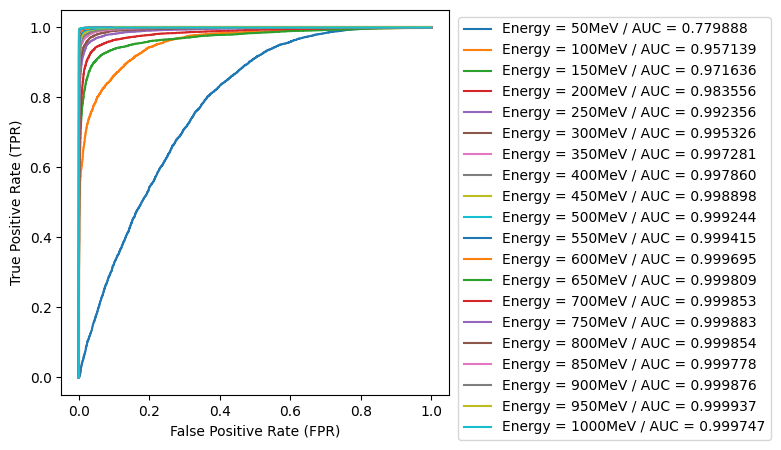

In [52]:

for energy in range(50,1050,50):
    if ((pred[(label==1)&(fname==energy)].shape[0]>0) & (pred[(label==0)&(fname==energy)].shape[0]>0)):
        fpr, tpr, thresholds = roc_curve(label[fname==energy], pred[fname==energy])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='Energy = '+str(energy)+'MeV / AUC = '+ f"{auc_score:.6f}")
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.legend(loc='best', bbox_to_anchor=(1.85,1.))
        # plt.show()

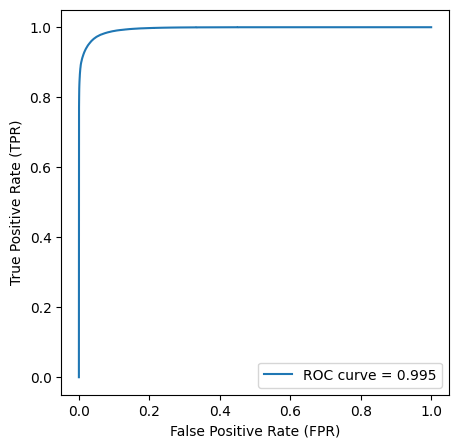

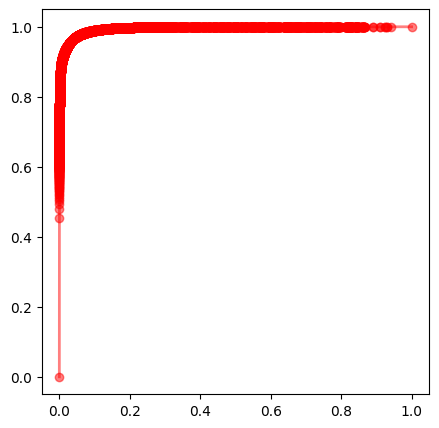

In [53]:


fpr, tpr, thresholds = roc_curve(label, pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve = '+ f"{auc_score:.3f}")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


# print('AUC:', auc_score)

plt.plot(fpr, tpr, color='r', linewidth=2, marker='o', alpha=0.5)